# Data-方法-03 决策树

## 0. 数据集
- 本次我们使用的数据集如规则学习里一样，为西瓜数据集2.0。

In [1]:
# coding: utf-8

import pandas as pd

'''读入西瓜数据集'''
path = '../数据集/西瓜数据/西瓜2.csv'

datas = pd.read_csv(path)
datas

,编号,色泽,根蒂,敲声,纹理,脐部,触感,好瓜
0,1,青绿,蜷缩,浊响,清晰,凹陷,硬滑,是
1,2,乌黑,蜷缩,沉闷,清晰,凹陷,硬滑,是
2,3,乌黑,蜷缩,浊响,清晰,凹陷,硬滑,是
3,4,青绿,蜷缩,沉闷,清晰,凹陷,硬滑,是
4,5,浅白,蜷缩,浊响,清晰,凹陷,硬滑,是
5,6,青绿,稍蜷,浊响,清晰,稍凹,软粘,是
6,7,乌黑,稍蜷,浊响,稍糊,稍凹,软粘,是
7,8,乌黑,稍蜷,浊响,清晰,稍凹,硬滑,是
8,9,乌黑,稍蜷,沉闷,稍糊,稍凹,硬滑,否
9,10,青绿,硬挺,清脆,清晰,平坦,软粘,否


In [2]:
'''得到特征集'''
features = {}
keys = []

for key in datas.keys():
    if key!='编号' and key!='好瓜':
        keys.append(key)
        features[key] = []

for key in keys:
    for value in datas[key]:
        if value not in features[key]:
            features[key].append(value)

features

{'色泽': ['青绿', '乌黑', '浅白'],
 '根蒂': ['蜷缩', '稍蜷', '硬挺'],
 '敲声': ['浊响', '沉闷', '清脆'],
 '纹理': ['清晰', '稍糊', '模糊'],
 '脐部': ['凹陷', '稍凹', '平坦'],
 '触感': ['硬滑', '软粘']}

In [3]:
'''得到数据集'''
dataSet = []

for i in range(len(datas)):
    data = {}
    for key in datas.keys():
        if key!='编号':
            data[key] = datas[key][i]
    dataSet.append(data)

dataSet

[{'色泽': '青绿',
  '根蒂': '蜷缩',
  '敲声': '浊响',
  '纹理': '清晰',
  '脐部': '凹陷',
  '触感': '硬滑',
  '好瓜': '是'},
 {'色泽': '乌黑',
  '根蒂': '蜷缩',
  '敲声': '沉闷',
  '纹理': '清晰',
  '脐部': '凹陷',
  '触感': '硬滑',
  '好瓜': '是'},
 {'色泽': '乌黑',
  '根蒂': '蜷缩',
  '敲声': '浊响',
  '纹理': '清晰',
  '脐部': '凹陷',
  '触感': '硬滑',
  '好瓜': '是'},
 {'色泽': '青绿',
  '根蒂': '蜷缩',
  '敲声': '沉闷',
  '纹理': '清晰',
  '脐部': '凹陷',
  '触感': '硬滑',
  '好瓜': '是'},
 {'色泽': '浅白',
  '根蒂': '蜷缩',
  '敲声': '浊响',
  '纹理': '清晰',
  '脐部': '凹陷',
  '触感': '硬滑',
  '好瓜': '是'},
 {'色泽': '青绿',
  '根蒂': '稍蜷',
  '敲声': '浊响',
  '纹理': '清晰',
  '脐部': '稍凹',
  '触感': '软粘',
  '好瓜': '是'},
 {'色泽': '乌黑',
  '根蒂': '稍蜷',
  '敲声': '浊响',
  '纹理': '稍糊',
  '脐部': '稍凹',
  '触感': '软粘',
  '好瓜': '是'},
 {'色泽': '乌黑',
  '根蒂': '稍蜷',
  '敲声': '浊响',
  '纹理': '清晰',
  '脐部': '稍凹',
  '触感': '硬滑',
  '好瓜': '是'},
 {'色泽': '乌黑',
  '根蒂': '稍蜷',
  '敲声': '沉闷',
  '纹理': '稍糊',
  '脐部': '稍凹',
  '触感': '硬滑',
  '好瓜': '否'},
 {'色泽': '青绿',
  '根蒂': '硬挺',
  '敲声': '清脆',
  '纹理': '清晰',
  '脐部': '平坦',
  '触感': '软粘',
  '好瓜': '否'},
 {'色泽': '浅白',
  '根蒂'

## 1. 一些工具

In [4]:
'''统计标签'''
def labelCount(dataSet):
    label_count = {}
    for data in dataSet:
        label_count[data['好瓜']] = 0
    for data in dataSet:
        label_count[data['好瓜']]+=1
    
    return label_count

'''按特征划分数据集'''
def splitDataSet(dataSet, feature, value):
    result = []
    for data in dataSet:
        if data[feature] == value:
            result.append(data)
    return result

**信息熵**(information entropy): $Ent(D)=-\sum^{|y|}_{k=1}p_k\log_2p_k$

**信息增益**(information gain): $Gain(D,a)=Ent(D)-\sum^V_{v=1}\frac{|D^v|}{|D|}Ent(D^v)$
- 用于ID3算法

**信息增益比**(information gain ratio): $Gain\_ratio(D,a)=\frac{Gain(D,a)}{IV(a)}$
- **固有值**(intrinsic value)：$IV(a)=-\sum^V_{v=1}\frac{|D|^v}{|D|}\log_2(\frac{|D^v|}{|D|})$
- 用于C4.5算法

**基尼系数**(Gini index): $Gini(D)=\sum^{|y|}_{k=1}\sum_{k'\neq k}p_kp_{k'}=1-\sum^{|y|}_{k=1}p_k^2$
- 用于CART算法

In [12]:
from math import log

'''信息熵 Ent'''
def calEnt(dataSet):
    data_num = len(dataSet)
    
    label_count = labelCount(dataSet)
    
    ent = 0
    for label in label_count.keys():
        prob = float(label_count[label])/data_num
        ent -= prob*log(prob,2)
    
    return ent

'''信息增益 Gain'''
def calGain(dataSet, features, feature):
    values = features[feature]
    
    gain = calEnt(dataSet)
    for value in values:
        subDataSet = splitDataSet(dataSet, feature, value)
        gain -= len(subDataSet)/float(len(dataSet))*calEnt(subDataSet)
    
    return gain

'''信息增益比 GainRatio'''
def calGainRatio(dataSet, features, feature):
    values = features[feature]
    
    gain = calEnt(dataSet)
    iv = 0
    for value in values:
        subDataSet = splitDataSet(dataSet, feature, value)
        if len(subDataSet)==0: continue
        r = len(subDataSet)/float(len(dataSet))
        gain -= r*calEnt(subDataSet)
        iv -= r*log(r,2)
    
    return gain/iv

'''基尼系数 Gini'''
def _calGini(dataSet):
    data_num = len(dataSet)
    
    label_count = labelCount(dataSet)
    
    gini = 1
    for label in label_count:
        prob = float(label_count[label])/data_num
        gini -= prob*prob
    
    return gini

def calGini(dataSet, features, feature):
    values = features[feature]
    
    gini = 0
    for value in values:
        subDataSet = splitDataSet(dataSet, feature, value)
        gini += len(subDataSet)/len(dataSet)*_calGini(subDataSet)
    
    return gini

In [6]:
'''绘制决策树'''
from graphviz import Digraph

def drawTree(tree):
    treeGraph = Digraph('决策树')
    
    def _drawTree(node, tree):
        treeGraph.node(node, tree['feature']+'=?', shape='box', style='rounded')
        
        for value in tree.keys():
            if value=='feature': continue
            if(tree[value]=='是' or tree[value]=='否'):
                treeGraph.node(node+'_'+value, tree['feature'], shape='ellipse')
                treeGraph.edge(node, node+'_'+value, label=value)
            else:
                treeGraph.node(node+'_'+value, tree['feature']+'=?', shape='box', style='rounded')
                treeGraph.edge(node, node+'_'+value, label=value)
                _drawTree(node+'_'+value, tree[value])
        
        return
    
    _drawTree('A', tree)
    
    treeGraph.attr(label='\n决策树')
    treeGraph.attr(fontsize='15')

    return treeGraph

## 2. ID3算法

In [7]:
'''ID3方法，创建决策树'''
def createTree_ID3(dataSet, features, threshold):
    label_count = labelCount(dataSet)
    
    # 如果特征集为空，则为单节点树
    if not features:
        return max(list(labelCount.items()),key = lambda x:x[1])[0]
    
    # 如果数据集只有一个类，则为单节点树
    if len(label_count) == 1:
        return list(label_count.keys())[0]
    
    # 计算按照不同特征划分的信息增益
    l = map(lambda x: [x, calGain(dataSet, features, x)], features)
    
    # 选择信息增益最大的特征
    feature, gain = max(l, key=lambda x:x[1])
    
    # 若小于阈值，则为单节点树
    if threshold > gain:
        return max(list(label_count.items()), key=lambda x:x[1])[0]
    
    tree = {}
    
    # 特征子集
    subFeatures = features.copy()
    del subFeatures[feature]

    tree['feature'] = feature
    # 子树
    for value in features[feature]:
        subDataSet = splitDataSet(dataSet, feature, value)
        
        if not subDataSet: continue
        
        tree[value] = createTree_ID3(subDataSet, subFeatures, threshold)
    
    return tree

tree_ID3 = createTree_ID3(dataSet, features, 0.1)
tree_ID3

{'feature': '纹理',
 '清晰': {'feature': '根蒂',
  '蜷缩': '是',
  '稍蜷': {'feature': '色泽',
   '青绿': '是',
   '乌黑': {'feature': '触感', '硬滑': '是', '软粘': '否'}},
  '硬挺': '否'},
 '稍糊': {'feature': '触感', '硬滑': '否', '软粘': '是'},
 '模糊': '否'}

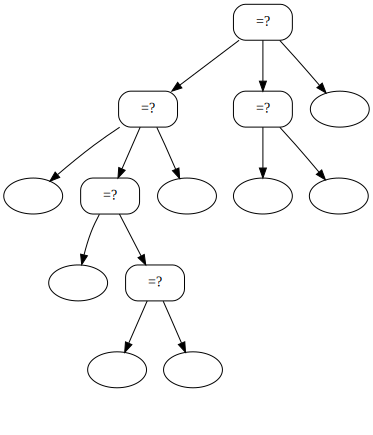

In [8]:
'''展示决策树'''
treeGraph_ID3 = drawTree(tree_ID3)

treeGraph_ID3.render(filename='03-01', directory='./', format='png', cleanup='true')
treeGraph_ID3

### 3. C4.5算法

In [14]:
'''ID3方法，创建决策树'''
def createTree_C45(dataSet, features, threshold):
    label_count = labelCount(dataSet)
    
    # 如果特征集为空，则为单节点树
    if not features:
        return max(list(labelCount.items()),key = lambda x:x[1])[0]
    
    # 如果数据集只有一个类，则为单节点树
    if len(label_count) == 1:
        return list(label_count.keys())[0]
    
    # 计算按照不同特征划分的信息增益
    l = map(lambda x: [x, calGainRatio(dataSet, features, x)], features)
    
    # 选择信息增益最大的特征
    feature, gain = max(l, key=lambda x:x[1])
    print(gain)
    
    # 若小于阈值，则为单节点树
    if threshold > gain:
        return max(list(label_count.items()), key=lambda x:x[1])[0]
    
    tree = {}
    
    # 特征子集
    subFeatures = features.copy()
    del subFeatures[feature]

    tree['feature'] = feature
    # 子树
    for value in features[feature]:
        subDataSet = splitDataSet(dataSet, feature, value)
        
        if not subDataSet: continue
        
        tree[value] = createTree_C45(subDataSet, subFeatures, threshold)
    
    return tree

tree_C45 = createTree_C45(dataSet, features, 0.1)
tree_C45

0.2630853587192754
0.49886526560234923
0.274017542121281
1.0
1.0


{'feature': '纹理',
 '清晰': {'feature': '触感',
  '硬滑': '是',
  '软粘': {'feature': '色泽',
   '青绿': {'feature': '根蒂', '稍蜷': '是', '硬挺': '否'},
   '乌黑': '否'}},
 '稍糊': {'feature': '触感', '硬滑': '否', '软粘': '是'},
 '模糊': '否'}

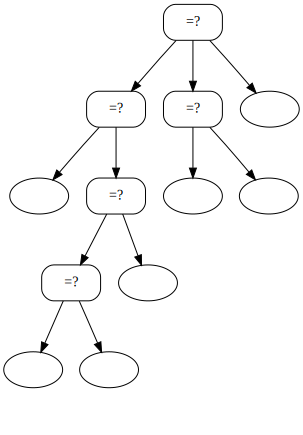

In [15]:
'''展示决策树'''
treeGraph_C45 = drawTree(tree_C45)

treeGraph_C45.render(filename='03-02', directory='./', format='png', cleanup='true')
treeGraph_C45